# Importing Data

First off, we are going to learn how to import text files, which we can broadly calssify in 2 types.

* Plain Text

* Tables ( Flat File)

In this exercise, you'll be working with the file moby_dick.txt. It is a text file that contains the opening sentences of Moby Dick, one of the great American novels! Here you'll get experience opening a text file, printing its contents to
the shell and, finally, closing it.

#### Instructions
* Open the file moby_dick.txt as read-only and store it in the variable file. Make sure to pass the filename enclosed in quotation marks ''.
* Print the contents of the file to the shell using the print() function. You'll need to apply the method read() to the object file.
* Check whether the file is closed by executing print(file.closed).
* Close the file using the close() method.
* Check again that the file is closed as you did above.

In [1]:
# Open a file: file
file = open('./datasets/moby_dick.txt', mode='r')

# Print it
print(file.read())

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

In [2]:
# Check whether file is closed
print("Is The file closed",file.closed)

# Close file
file.close()

# Check whether file is closed
print("Is The file closed",file.closed)

Is The file closed False
Is The file closed True


Is essential to any budding data scientist to know precisely what the term flat file means. Flat files are basic files containing records, table data without structured relatioships. This is in contrast with relational databases which columns of distinct tables can be related.

It also importan notice that flat file can have a **header**. Normally, the header is the first row which contain the names of attributes or features. 

File extensions
* .txt (text document).
* .csv (coma separated values. In this type of file, the values there are can be separated by tabs and/or other characters. This is named "delimiters".

## Using NumPy to import flat files

In this exercise, you're now going to load the MNIST digit recognition dataset using
the numpy function loadtxt() and see just how easy it can be:

* The first argument will be the filename.
* The second will be the delimiter which, in this case, is a comma.

You can find more information about the MNIST dataset [here](http://yann.lecun.com/exdb/mnist/) on the webpage of Yann LeCun,
who is currently Director of AI Research at Facebook and Founding Director of the NYU
Center for Data Science, among many other things.

Instructions
* Fill in the arguments of np.loadtxt() by passing file and a comma ',' for the delimiter.
* Fill in the argument of print() to print the type of the object digits. Use the function type().
* Execute the rest of the code to visualize one of the rows of the data.

<class 'numpy.ndarray'>


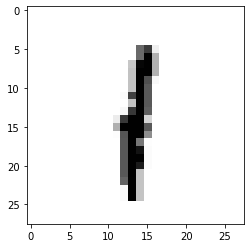

In [5]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
file = './datasets/digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')# ohter arguments: skiprows = # (skip the number of rows given by parameter),
#usecols = # (import just the columns given by parameter)

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[12, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


The file seaslug.txt

has a text header, consisting of strings
is tab-delimited.
These data consists of percentage of sea slug larvae that had metamorphosed in a
given time period. Read more here.

Due to the header, if you tried to import it as-is using np.loadtxt(), Python
would throw you a ValueError and tell you that it could not convert string to float. There are two ways to deal with this: firstly, you can set the data type argument dtype equal to str (for string).

Alternatively, you can skip the first row as we have seen before, using the skiprows
argument.

Instructions
* Complete the first call to np.loadtxt() by passing file as the first argument.
* Execute print(data[0]) to print the first element of data.
* Complete the second call to np.loadtxt(). The file you're importing is tab-delimited, the datatype is float, and you want to skip the first row.
* Print the 10th element of data_float by completing the print() command. Be guided by the previous print() call.
* Execute the rest of the code to visualize the data.


['Time' 'Percent']
[0.    0.357]


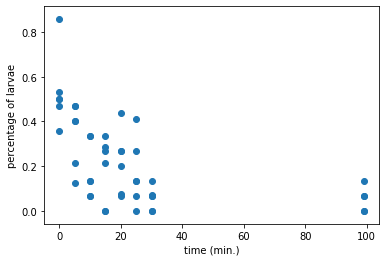

In [7]:
# Assign filename: file
file = './datasets/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


## Working with mixed datatypes 
Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. There is another function, np.genfromtxt(), which can handle such structures. If we pass dtype=None to it, it will figure out what types each column should be.

Import 'titanic.csv' using the function np.genfromtxt() as follows:

`data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)`
Here, the first argument is the filename, the second specifies the delimiter , and the third argument names tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing `np.shape(data)`.

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute `data[i]` and to get the column with name 'Fare', execute 

In [9]:
data = np.genfromtxt('./datasets/titanic.csv', delimiter=',', names=True, dtype=None)

print(np.shape(data))

print(data)

(891,)
[(  1, 0, 3, b'male', 22.  , 1, 0, b'A/5 21171',   7.25  , b'', b'S')
 (  2, 1, 1, b'female', 38.  , 1, 0, b'PC 17599',  71.2833, b'C85', b'C')
 (  3, 1, 3, b'female', 26.  , 0, 0, b'STON/O2. 3101282',   7.925 , b'', b'S')
 (  4, 1, 1, b'female', 35.  , 1, 0, b'113803',  53.1   , b'C123', b'S')
 (  5, 0, 3, b'male', 35.  , 0, 0, b'373450',   8.05  , b'', b'S')
 (  6, 0, 3, b'male',   nan, 0, 0, b'330877',   8.4583, b'', b'Q')
 (  7, 0, 1, b'male', 54.  , 0, 0, b'17463',  51.8625, b'E46', b'S')
 (  8, 0, 3, b'male',  2.  , 3, 1, b'349909',  21.075 , b'', b'S')
 (  9, 1, 3, b'female', 27.  , 0, 2, b'347742',  11.1333, b'', b'S')
 ( 10, 1, 2, b'female', 14.  , 1, 0, b'237736',  30.0708, b'', b'C')
 ( 11, 1, 3, b'female',  4.  , 1, 1, b'PP 9549',  16.7   , b'G6', b'S')
 ( 12, 1, 1, b'female', 58.  , 0, 0, b'113783',  26.55  , b'C103', b'S')
 ( 13, 0, 3, b'male', 20.  , 0, 0, b'A/5. 2151',   8.05  , b'', b'S')
 ( 14, 0, 3, b'male', 39.  , 1, 5, b'347082',  31.275 , b'', b'S')
 ( 15, 

c:\users\gabriela\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [10]:
print(data[1])# print the second column

(2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')


In [11]:
print(data['Fare'])#print the Fare column

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.       7.8958  41.5792   7.8792   8.05    15.5      7.75
  21.6792  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5
  10.5      7.2292  27.75    46.9      7.2292  80.      83.475   27.9
  27.7208  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9
  73.5     14.4542  56.4958   7.65     7.8958   8.05    29.      12.475
   9.       9.5      7.7875  47.1     10.5     15.85    34.375    8.05
 263.       8.05     8.05     7.8542  61.175   20.575    7.25     8.05
  34.6542  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542
   7.925    7.8958   7.65     7.775    7.8958  24.15    52.      14.4542
  

In [12]:
print(data[1]['Fare'])#value of the second row and fare column

71.2833


## Using Pandas to import flat files

In difference with above, pandas can fulfil one most basic needs of a data scientist: to have 2-dimensional labeled structures with columns of potentially different types to easily perform thing on manipulate, slice, reshaped, group by, join, merge, get statistics, deal with time series and so on. 
The mainly object in pandas is called DataFrames. Manipulating DataFrames in pandas can be usefull in all steps of a data scientific methods from exploratory data analysis to data wrangling, preprocessing, building models and visualization. 

In [14]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = './datasets/titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [ ]:
# Assign the filename: file
file = './datasets/digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
print(type(data_array))
print(data_array)


The pandas package is also great at dealing with many of the issues you willencounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also
commonly referred to as NA or NaN. To wrap up this chapter, you're now going to import a slightly corrupted copy of the Titanic dataset titanic_corrupt.txt, which

* contains comments after the character '#'
* is tab-delimited.

#### Instructions
* Complete the sep (the pandas version of delim), comment and na_values arguments of pd.read_csv(). comment takes characters that comments occur after in the file, which in this case is '#'. na_values takes a list of strings to recognize as NA/NaN, in this case the string 'Nothing'.
* Execute the rest of the code to print the head of the resulting DataFrame and plot the histogram of the 'Age' of passengers aboard the Titanic.

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin    Embarked  
0         A/5 21171   7.2500   NaN  S #dfafdad  
1       PC 17599#to  71.2833   C85           C  
2  STON/O2. 3101282   7.9250   NaN           S  
3            113803  53.1000  C123           S  
4            373450   8.0500   NaN           S  


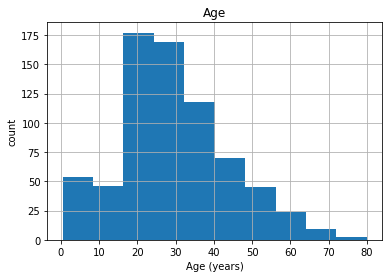

In [18]:
# Assign filename: file
file = './datasets/titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()


# Other types

In data science commonly is neccesary deal with othe types or formats of files such as:
* Excel files (.xlxs)
* Matlab files (.m)
* Sas files
* Stata files
* Pickle files (native of python)
* JSON dictionaries

### Using pickle files

In [21]:
import pickle

# take user input to take the amount of data
number_of_data = int(input('Enter the number of data : '))
data = []

# take input of the data
for i in range(number_of_data):
    raw = input('Enter data '+str(i)+' : ')
    data.append(raw)

# open a file, where you want to store the data
file = open('./datasets/Pfile', 'wb')

# dump information to that file
pickle.dump(data, file)

# close the file
file.close()

Enter the number of data : 2
Enter data 0 : a
Enter data 1 : s


In [ ]:
import pickle

# open a file, where you stored the pickled data
file = open('./datasets/Pfile', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

### Listing sheets in Excel files

Whether you like it or not, any working data scientist will need to dealwith Excel spreadsheets at some point in time. You won't always want to doso in Excel, however!

Here, you'll learn how to use pandas to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

Recall from the video that, given an Excel file imported into a variable spreadsheet,you can retrieve a list of the sheet names using the attribute spreadsheet.sheet_names.

Specifically, you'll be loading and checking out the spreadsheet 'battledeath.xlsx', modified from the Peace Research Institute Oslo's (PRIO) dataset. This data contains age-adjusted mortality rates due to war in various countries over several years.

#### Instructions
* Assign the filename to the variable file.
* Pass the correct argument to pd.ExcelFile() to load the file using pandas.
* Print the sheetnames of the Excel spreadsheet by passing the necessary argument to the print() function.

In [23]:
import pandas as pd

# Assign spreadsheet filename: file
file = './datasets/battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)


['2002', '2004']


Importing sheets from Excel files
100xp

In the previous exercises, you saw that the Excel file contains two sheets,
'2002' and '2004'. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded
.xslx file as a DataFrame. You'll be able to do so by specifying either the
sheet's name or its index.

The spreadsheet 'battledeath.xlsx' is already loaded as xl.

Instructions
-Load the sheet '2004' into the DataFrame df1 using its name as a string.
-Print the head of df1 to the shell.
-Load the sheet 2002 into the DataFrame df2 using its index.
-Print the head of df2 to the shell.


In [28]:
# Load a sheet into a DataFrame by name of the sheet: df1
df1 = xl.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load a sheet into a DataFrame by indexof the sheet : df2
df2 = xl.parse(0)

# Print the head of the DataFrame df2
print(df2.head())


  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


Here, you'll parse your spreadsheets and use additional arguments to skip rows,
rename columns and select only particular columns.

In [27]:
# Parse the first sheet and rename the columns: df1
df1 = xl.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])# skip Afghanistan

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xl.parse(0, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


### Importing SAS files

In this exercise, you'll figure out how to import a SAS file as a DataFrame using SAS7BDAT and pandas.

The data are adapted from the website of the undergraduate text book [Principles of Economics](http://www.principlesofeconometrics.com/sas/) by Hill, Griffiths and Lim.

Instructions
* Import the module SAS7BDAT from the library sas7bdat.
* In the context of the file 'sales.sas7bdat', load its contents to a DataFrame df_sas, using the method to_data_frame() on the object file.
* Print the head of the DataFrame df_sas.
* Execute your entire script to produce a histogram plot!


     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


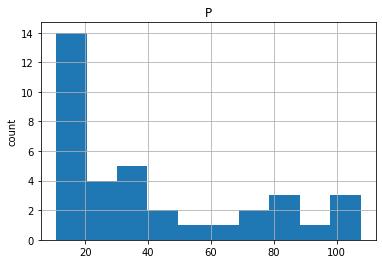

In [30]:
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('./datasets/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

### Using read_stata to import Stata files

The data consist of disease extents for several diseases in various countries (more
information can be found here).

In [32]:
df = pd.read_stata('./datasets/disarea.dta')
print(df.head())

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0